<a href="https://colab.research.google.com/github/suajeong52/collapsible_tube/blob/main/sua_collapsibletube_try_(grid30)_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
pip install sciann

In [60]:
import numpy as np 
import sciann as sn 
import matplotlib.pyplot as plt  
from numpy import pi
from sciann.utils.math import diff, sign, sin, sqrt, pow

In [61]:
x = sn.Variable('x')
t = sn.Variable('t')
u = sn.Functional('u', [x,t], 8*[20], 'relu')
#A = sn.Functional('A', [x,t],  8*[20], 'relu')

In [62]:
#L1 = diff(A, t) + u * diff(A, x) + A * diff(u, x)

In [63]:
rho = 1
#beta = 200
beta = 1
#L2 = diff(u, t) + u * diff(u, x) + beta / (2 * rho * sn.pow(A * A + 0.01, 0.25)) * diff(A, x, order=1)
L2 = diff(u, t) + u * diff(u, x)  

In [64]:
TOL = 0.001
T = 10
omega = 2 * np.pi / T
C1 = (1 - sign(t - TOL)) * (u - 0)
#C2 = (1 - sign(t - TOL)) * (A - 1)
#C3 = (1 - sign(x - TOL)) * (u - sin(omega * t))
C3 = (1 - sign(x - TOL)) * (u - sin(2*np.pi * t))
#C4 = (1 - sign(x - TOL)) * (A - 1)


In [65]:
#m = sn.SciModel([x,t], [L1,L2, C1, C3, C4], loss_func="mse", optimizer="Adam")
m = sn.SciModel([x,t], [L2, C1, C3], loss_func="mse", optimizer="Adam")

In [66]:
x_data, t_data = np.meshgrid(
    np.linspace(0, 1, 100), 
    np.linspace(0, 1, 100)
)

In [67]:
#h = m.train([x_data, t_data], 6*['zero'], learning_rate=0.001, epochs=1000, batch_size =120,  verbose=1, shuffle=True)
h = m.train([x_data, t_data], 3*['zero'], learning_rate=0.007, epochs=3000, batch_size =200, verbose=1, shuffle=True)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
50/50 [==============================] - 0s 7ms/step - batch: 24.5000 - size: 200.0000 - loss: 0.0181 - add_3_loss: 8.2004e-04 - mul_10_loss: 2.3338e-04 - mul_12_loss: 0.0170 - lr: 0.0070 - time: 0.3785
Epoch 509/3000
50/50 [==============================] - 0s 7ms/step - batch: 24.5000 - size: 200.0000 - loss: 0.0183 - add_3_loss: 7.6280e-04 - mul_10_loss: 2.2179e-04 - mul_12_loss: 0.0173 - lr: 0.0070 - time: 0.3719
Epoch 510/3000
50/50 [==============================] - 0s 7ms/step - batch: 24.5000 - size: 200.0000 - loss: 0.0182 - add_3_loss: 7.8904e-04 - mul_10_loss: 1.9082e-04 - mul_12_loss: 0.0172 - lr: 0.0070 - time: 0.3538
Epoch 511/3000
50/50 [==============================] - 0s 6ms/step - batch: 24.5000 - size: 200.0000 - loss: 0.0181 - add_3_loss: 8.3528e-04 - mul_10_loss: 2.5535e-04 - mul_12_loss: 0.0170 - lr: 0.0070 - time: 0.3298
Epoch 512/3000
50/50 [==============================] - 0s 6ms/step - batch: 24.5000 - size: 200.0000 - los

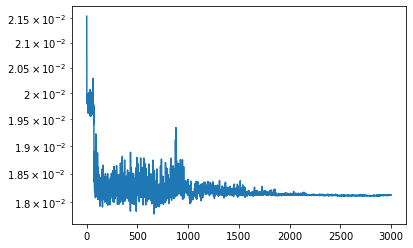

In [68]:
plt.semilogy(h.history['loss'])

In [69]:
h.history.keys()

dict_keys(['loss', 'add_3_loss', 'mul_10_loss', 'mul_12_loss', 'lr', 'time'])

<function matplotlib.pyplot.show>

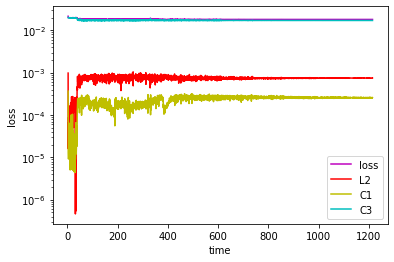

In [71]:
time = np.cumsum(h.history['time'])
plt.semilogy(time, h.history['loss'],'m')
plt.semilogy(time, h.history['add_3_loss'],'r')
#plt.semilogy(time, h.history['add_5_loss'],'b')
plt.semilogy(time, h.history['mul_10_loss'],'y')
plt.semilogy(time, h.history['mul_12_loss'],'c')
#plt.semilogy(time, h.history['mul_10_loss'],'k')
#plt.semilogy(time, h.history['mul_11_loss'],'g')
plt.legend(['loss','L2','C1', 'C3'])
plt.xlabel('time')
plt.ylabel('loss')
plt.show

In [72]:
x_test, t_test = np.meshgrid(
    np.linspace(0, 1, 30), 
    np.linspace(0, 0, 1)
)
u_pred = u.eval(m, [x_test, t_test])
#A_pred = A.eval(m, [x_test, t_test])




In [73]:
u_pred

array([[0.159024  , 0.15183985, 0.14465573, 0.13747162, 0.1302875 ,
        0.1231033 , 0.11591917, 0.10873506, 0.10155085, 0.09436678,
        0.08718268, 0.07999846, 0.07281432, 0.06563025, 0.05844598,
        0.0512618 , 0.04407783, 0.03689369, 0.02970957, 0.02252534,
        0.01534121, 0.00815705, 0.00599695, 0.00533091, 0.00466493,
        0.00404615, 0.00378723, 0.00352849, 0.00326956, 0.00312663]],
      dtype=float32)

In [74]:
u_pred = np.reshape(u_pred,30)
#A_pred = np.reshape(A_pred,30)

In [75]:
u_pred

array([0.159024  , 0.15183985, 0.14465573, 0.13747162, 0.1302875 ,
       0.1231033 , 0.11591917, 0.10873506, 0.10155085, 0.09436678,
       0.08718268, 0.07999846, 0.07281432, 0.06563025, 0.05844598,
       0.0512618 , 0.04407783, 0.03689369, 0.02970957, 0.02252534,
       0.01534121, 0.00815705, 0.00599695, 0.00533091, 0.00466493,
       0.00404615, 0.00378723, 0.00352849, 0.00326956, 0.00312663],
      dtype=float32)

In [76]:
x_test

array([[0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
        0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
        0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
        0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
        0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
        0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ]])

In [77]:
x_test = np.reshape(x_test, 30)
x_test

array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ])

Text(0, 0.5, 'u')

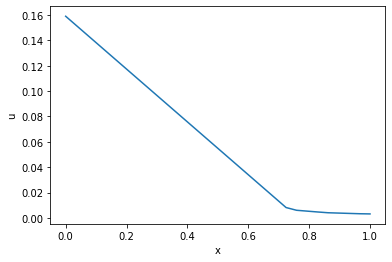

In [78]:
#fig = plt.figure(figsize=(3, 4))
plt.plot(x_test, u_pred)
plt.xlabel('x')
plt.ylabel('u')

Text(0, 0.5, 'u')

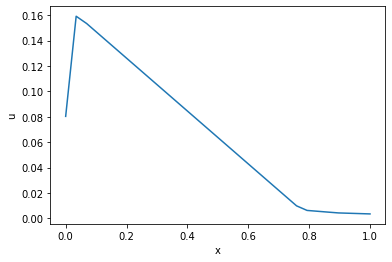

In [79]:
x_test, t_test = np.meshgrid(
    np.linspace(0, 1, 30), 
    np.linspace(0.5, 0.5, 1)
)
u_pred = u.eval(m, [x_test, t_test])
#A_pred = A.eval(m, [x_test, t_test])


u_pred = np.reshape(u_pred,30)
#A_pred = np.reshape(A_pred,30)
x_test = np.reshape(x_test, 30)


#fig = plt.figure(figsize=(3, 4))
plt.plot(x_test, u_pred)
plt.xlabel('x')
plt.ylabel('u')

Text(0, 0.5, 'u')

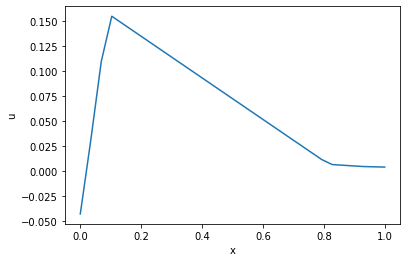

In [80]:
x_test, t_test = np.meshgrid(
    np.linspace(0, 1, 30), 
    np.linspace(1, 1, 1)
)
u_pred = u.eval(m, [x_test, t_test])
#A_pred = A.eval(m, [x_test, t_test])


u_pred = np.reshape(u_pred,30)
#A_pred = np.reshape(A_pred,30)
x_test = np.reshape(x_test, 30)


#fig = plt.figure(figsize=(3, 4))
plt.plot(x_test, u_pred)
plt.xlabel('x')
plt.ylabel('u')